# Outlier Analysis/Histograms and Box Plots

@authors: vcle, bpuhani

In [87]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd

## Loading the necessary data.
For this notebook to work, we must load the ensembles from a pickle file that holds the data from running our chain.
And load the stats from the approved plan.

this requires running first:
* `B_6_IL_run_chain.ipynb`
* `B_7_IL_get_approved_plan_stats.ipynb`

The lists in the two dictionaries are labeled as follows:
* `list_of_nr_of_cut_edges`
* `list_of_dem_won_districts_pre20`
* `list_of_dem_won_districts_uss20`
* `list_of_eg_pre20`
* `list_of_eg_uss20`
* `list_of_dem_percents_pre20`
* `list_of_dem_percents_uss20`

In [88]:
# Load the 40_000 steps from running the gerrychain data from the .pkl file
with open('checkpoints/IL_plot_results_40_000.pkl', 'rb') as file:
    checkpoint_dict = pickle.load(file)

In [89]:
# Load the approved plan stats from the .pkl file
with open('checkpoints/IL_approved_congress_stats.pkl', 'rb') as file:
    approved_plan_stats = pickle.load(file)

### Split the checkpoint_dict into one with all the data and one with half the data

In [90]:
ensemble_with_40_000 = checkpoint_dict

In [91]:
ensemble_with_20_000 = {
    key: value[:len(value) // 2] for key, value in checkpoint_dict.items()
}

Double-check that the length of the two ensembles is correct.

In [92]:
assert len(ensemble_with_40_000["list_of_nr_of_cut_edges"]) == 40_000

In [93]:
assert len(ensemble_with_20_000["list_of_nr_of_cut_edges"]) == 20_000

## Cut Edges Ensemble

In [94]:
# Extract the cut-edge ensemble
cut_edge_ensemble_with_40000 = ensemble_with_40_000["list_of_nr_of_cut_edges"]
print(len(cut_edge_ensemble_with_40000))

40000


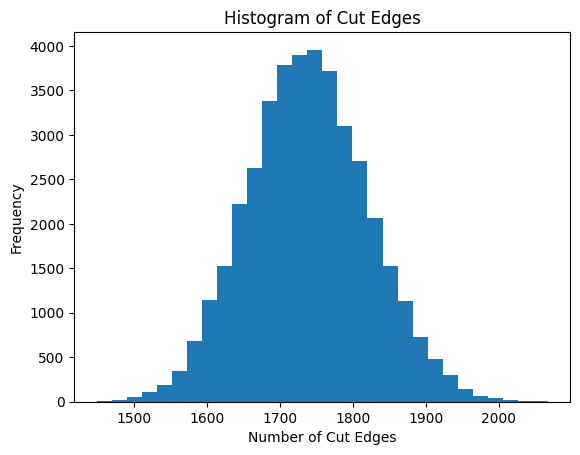

In [95]:
# Plot the histogram
plt.figure()
plt.hist(cut_edge_ensemble_with_40000, align='left', bins=30)  # Adjust bins as needed
plt.title("Histogram of Cut Edges")
plt.xlabel("Number of Cut Edges")
plt.ylabel("Frequency")
plt.show()

#### In order to see whether or not the chain has converged, we will compare 20,000 steps to 40,000 steps.

In [96]:
cutedge_ensemble_with_20_000 = ensemble_with_20_000["list_of_nr_of_cut_edges"]

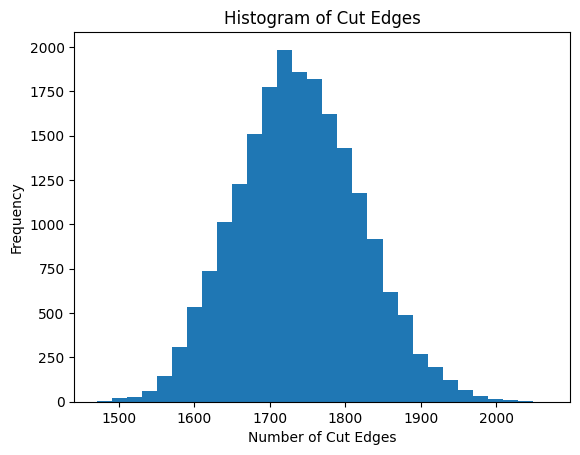

In [97]:
# Plot the histogram
plt.figure()
plt.hist(cutedge_ensemble_with_20_000, align='left', bins=30)  # Adjust bins as needed
plt.title("Histogram of Cut Edges")
plt.xlabel("Number of Cut Edges")
plt.ylabel("Frequency")
plt.show()

#### We see below that the histograms of the two produce a similar distribution shape, which suggests convergence.

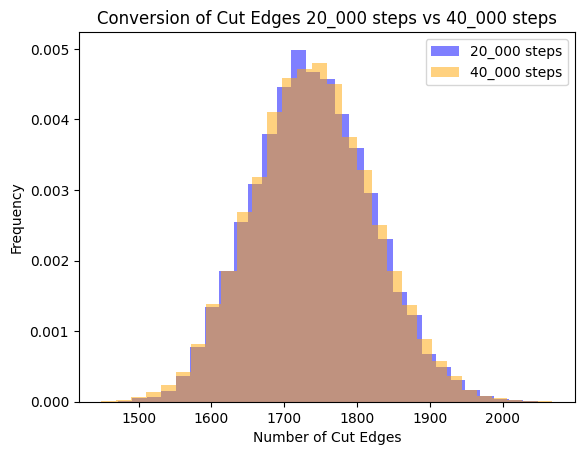

In [100]:
# Overlay the histograms
plt.figure()
plt.hist(cutedge_ensemble_with_20_000, bins=30, alpha=0.5, label="20_000 steps", color="blue", align='left', density=True)  # First half
plt.hist(cut_edge_ensemble_with_40000, bins=30, alpha=0.5, label="40_000 steps", color="orange", align='left', density=True)  # Full ensemble
plt.title("Conversion of Cut Edges 20_000 steps vs 40_000 steps")
plt.xlabel("Number of Cut Edges")
plt.ylabel("Frequency")
plt.legend()  # Add a legend to distinguish the datasets
plt.show()

A conversation is definitely visible.

So we are using the 20_000 steps for the following analysis.

### Cut Edges Ensemble compared with the proposed plan

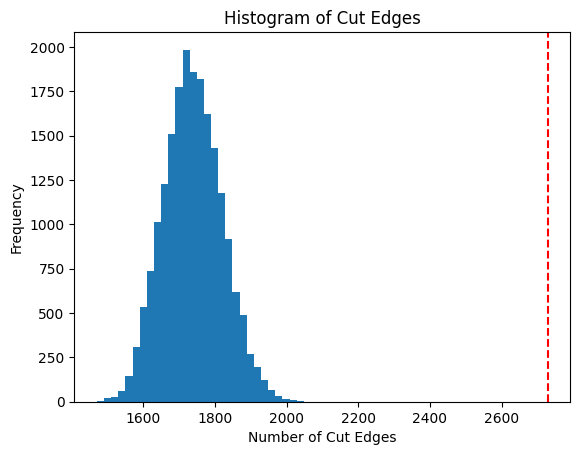

In [102]:
# Plot the histogram
plt.figure()
plt.hist(cutedge_ensemble_with_20_000, align='left', bins=30)  # Adjust bins as needed
plt.axvline(x=approved_plan_stats["list_of_nr_of_cut_edges"][0], color='r', linestyle='--', label=f'Proposed Plan: {approved_plan_stats["list_of_nr_of_cut_edges"][0]}')
plt.title("Histogram of Cut Edges")
plt.xlabel("Number of Cut Edges")
plt.ylabel("Frequency")
plt.show()

### Democratic-Won Districts (PRE20)

In [104]:
# Extract the Democratic-won Districts for the 2020 Presidential Election
dem_won_districts_pre20_ensemble = ensemble_with_20_000["list_of_dem_won_districts_pre20"]
print(len(dem_won_districts_pre20_ensemble))

20000


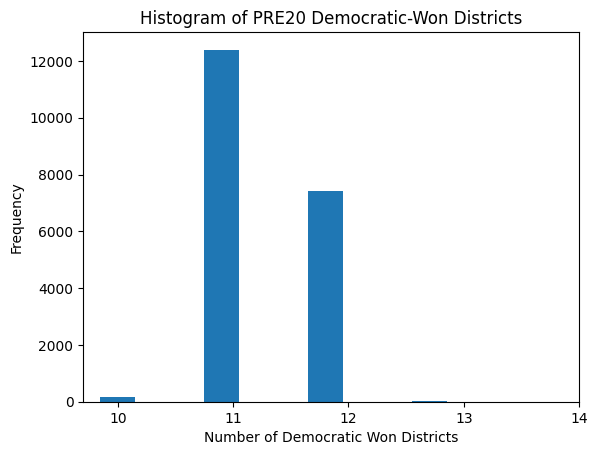

In [110]:
# Plot the Democratic-won Districts for the 2020 Presidential Election histogram
plt.figure()
plt.hist(dem_won_districts_pre20_ensemble,align='left')  # Specific bins for 10-15
plt.title("Histogram of PRE20 Democratic-Won Districts")
plt.xlabel("Number of Democratic Won Districts")
plt.ylabel("Frequency")
plt.xticks([10, 11, 12, 13, 14])  # Only show these values on x-axis
plt.show()

### Democratic-Won Districts (USS20)

In [54]:
# Extract the Democratic-won Districts for the 2020 Senate Election
dem_won_districts_uss20_ensemble = checkpoint_dict["list_of_dem_won_districts_uss20"]
print(len(dem_won_districts_uss20_ensemble))

40000


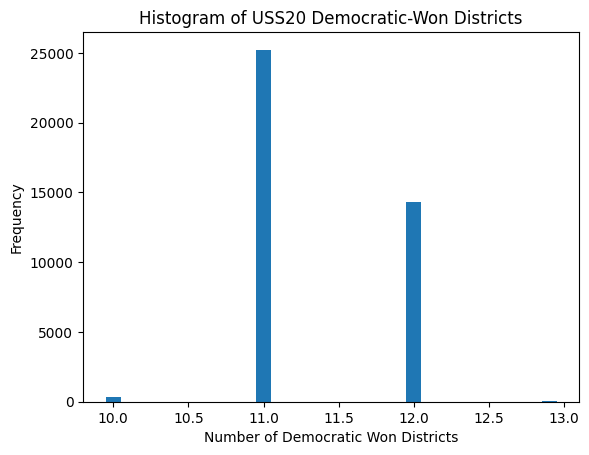

In [55]:
# Plot the Democratic-won Districts for the 2020 Senate Election Histogram
plt.figure()
plt.hist(dem_won_districts_uss20_ensemble, align='left', bins=30)  # Adjust bins as needed
plt.title("Histogram of USS20 Democratic-Won Districts")
plt.xlabel("Number of Democratic Won Districts")
plt.ylabel("Frequency")
plt.show()

### Efficiency Gap (PRE20)

In [56]:
# Extract the Efficiency Gap Values for PRE20
eg_pre20_ensemble = checkpoint_dict["list_of_eg_pre20"]
print(len(eg_pre20_ensemble))

40000


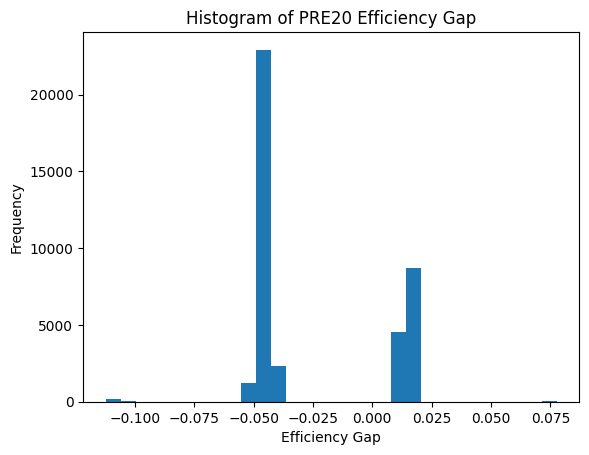

In [57]:
# Plot the Efficiency Gap Values for PRE20 Histogram
plt.figure()
plt.hist(eg_pre20_ensemble, align='left', bins=30)  # Adjust bins as needed
plt.title("Histogram of PRE20 Efficiency Gap")
plt.xlabel("Efficiency Gap")
plt.ylabel("Frequency")
plt.show()

### Efficiency Gap (USS20)

In [58]:
# Extract the Efficiency Gap Values for USS20
eg_uss20_ensemble = checkpoint_dict["list_of_eg_uss20"]
print(len(eg_uss20_ensemble))

40000


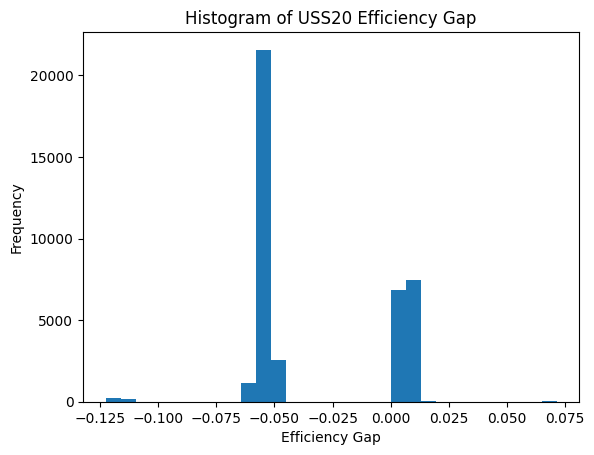

In [59]:
# Plot the Efficiency Gap Values for USS20 Histogram
plt.figure()
plt.hist(eg_uss20_ensemble, align='left', bins=30)  # Adjust bins as needed
plt.title("Histogram of USS20 Efficiency Gap")
plt.xlabel("Efficiency Gap")
plt.ylabel("Frequency")
plt.show()

## Boxplot (Signature of Gerrymandering)

#### Boxplot for PRE20 Democratic Vote Percents

In [60]:
# Extract PRE20 Democratic Percents list
dem_percents_pre20_ensemble = checkpoint_dict["list_of_dem_percents_pre20"]
print(len(dem_percents_pre20_ensemble))

40000


In [61]:
# Convert list into a Pandas DataFrame so that we can use Pandas boxplot method
dem_percents_pre20_df = pd.DataFrame(dem_percents_pre20_ensemble)

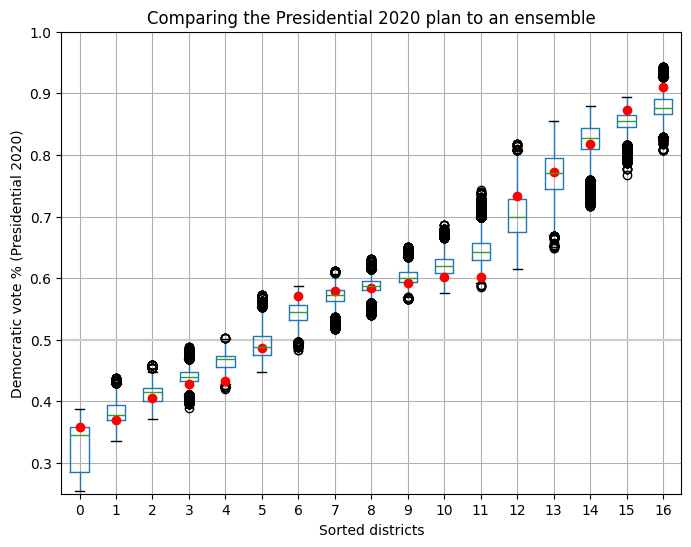

In [62]:
fig, ax = plt.subplots(figsize=(8, 6))

# Draw 50% line
ax.axhline(0.5, color="#cccccc")

# Draw boxplot
dem_percents_pre20_df.boxplot(ax=ax, positions=range(len(dem_percents_pre20_df.columns)))

# Draw initial plan's Democratic vote %s (.iloc[0] gives the first row, which corresponds to the initial plan)
plt.plot(dem_percents_pre20_df.iloc[0], "ro")

# Annotate
ax.set_title("Comparing the Presidential 2020 plan to an ensemble")
ax.set_ylabel("Democratic vote % (Presidential 2020)")
ax.set_xlabel("Sorted districts")
ax.set_ylim(0.25, 1)
ax.set_yticks([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.savefig('images/ILbox_plotPres2020.svg')
plt.show()

#### Boxplot for USS20 Democratic Vote Percents

In [63]:
# Extract USS20 Democratic Percents list
dem_percents_uss20_ensemble = checkpoint_dict["list_of_dem_percents_uss20"]
print(len(dem_percents_uss20_ensemble))

40000


In [64]:
# Convert list into a Pandas DataFrame so that we can use Pandas boxplot method
dem_percents_uss20_df = pd.DataFrame(dem_percents_uss20_ensemble)

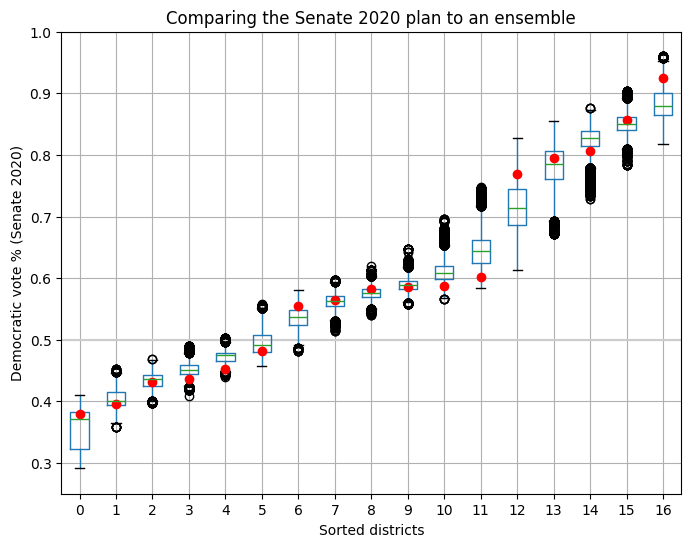

In [65]:
fig, ax = plt.subplots(figsize=(8, 6))

# Draw 50% line
ax.axhline(0.5, color="#cccccc")

# Draw boxplot
dem_percents_uss20_df.boxplot(ax=ax, positions=range(len(dem_percents_uss20_df.columns)))

# Draw initial plan's Democratic vote %s (.iloc[0] gives the first row, which corresponds to the initial plan)
plt.plot(dem_percents_uss20_df.iloc[0], "ro")

# Annotate
ax.set_title("Comparing the Senate 2020 plan to an ensemble")
ax.set_ylabel("Democratic vote % (Senate 2020)")
ax.set_xlabel("Sorted districts")
ax.set_ylim(0.25, 1)
ax.set_yticks([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.savefig('images/ILbox_plotSen2020.svg')
plt.show()